In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [10]:
class Perceptron:

  def __init__(self, weights, bias, learningRate):
    self.weights = weights
    self.bias = bias
    self.learningRate = learningRate

  def predict(self, featuresVec):
    print(f'predict val = {self.sigmoid(np.dot(featuresVec, self.weights) + self.bias)}')
    return 1 if self.sigmoid(np.dot(featuresVec, self.weights) + self.bias) >= 0.5 else 0

  def train(self, x, y):
    m, n = x.shape

    temp_weights = np.zeros((n, ))
    temp_bias = 0
    
    for i in range(m):
      err = self.predict(x[i]) - y[i]

      for j in range(n):
        temp_weights[j] += self.learningRate * err * x[i, j]

      temp_bias += self.learningRate * err

    temp_weights /= m
    temp_bias /= m

    self.weights = temp_weights
    self.bias = temp_bias

    return self.weights, self.bias

  def sigmoid(self, z):
    return 1 / (1 + np.exp(-z))

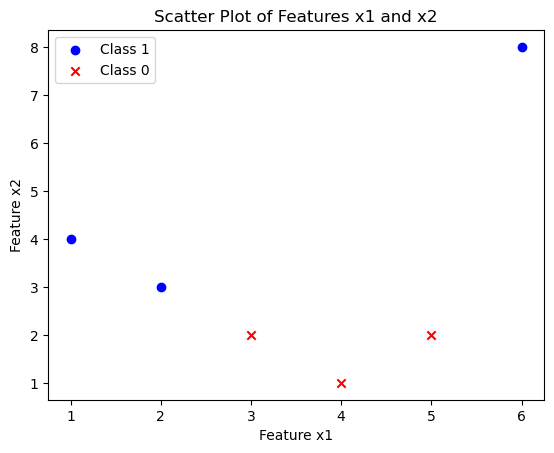

predict val = 0.5
predict val = 0.5
predict val = 0.5
predict val = 0.5
predict val = 0.5
predict val = 0.5
weights: [0.002 0.001]
bias: 0.0005
predict val = 0.5017499928542016
prediction 1 = 1 where x = [2 3]
predict val = 0.5014583291980272
prediction 2 = 1 where x = [1 4]
predict val = 0.5023333163952093
prediction 3 = 1 where x = [4 1]
predict val = 0.5020416553194237
prediction 4 = 1 where x = [3 2]
predict val = 0.5030416291462922
prediction 5 = 1 where x = [5 2]
predict val = 0.5047915199827228
prediction 6 = 1 where x = [6 8]
[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22
 23 24 25 26 27 28 29]
Input (z), Output (sigmoid(z))
[[-1.     0.269]
 [ 0.     0.5  ]
 [ 1.     0.731]
 [ 2.     0.881]
 [ 3.     0.953]
 [ 4.     0.982]
 [ 5.     0.993]
 [ 6.     0.998]
 [ 7.     0.999]
 [ 8.     1.   ]
 [ 9.     1.   ]
 [10.     1.   ]
 [11.     1.   ]
 [12.     1.   ]
 [13.     1.   ]
 [14.     1.   ]
 [15.     1.   ]
 [16.     1.   ]
 [17.     1.   ]
 [18.     

Text(0.5, 0, 'z')

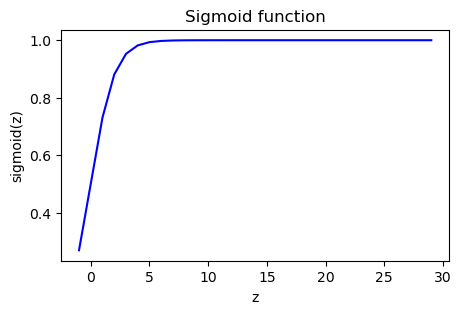

In [19]:
# training inputs
x = np.array([[2, 3], [1, 4], [4, 1], [3, 2], [5, 2], [6, 8]])
# output classes for x (training inputs)
y = np.array([1, 1, 0, 0, 0, 1])

# create a scatter plot
plt.scatter([2, 1, 6], [3, 4, 8], c = 'b', marker = 'o', label = 'Class 1')
plt.scatter([4, 3, 5], [1, 2, 2], c = 'r', marker = 'x', label = 'Class 0')

# add labels and a title
plt.xlabel('Feature x1')
plt.ylabel('Feature x2')
plt.title('Scatter Plot of Features x1 and x2')

plt.legend()
plt.show()

perceptron = Perceptron([0, 0], 0, 0.001)

w, b = perceptron.train(x, y)

print(f'weights: {w}')
print(f'bias: {b}')

for i in range(len(x)):
    print(f'prediction {i + 1} = {perceptron.predict(x[i])} where x = {x[i]}')


# Generate an array of evenly spaced values between -10 and 10
z_tmp = np.arange(-1, 30)

print(z_tmp)

# Use the function implemented above to get the sigmoid values
y = perceptron.sigmoid(z_tmp)

# Code for pretty printing the two arrays next to each other
np.set_printoptions(precision=3) 
print("Input (z), Output (sigmoid(z))")
print(np.c_[z_tmp, y])

fig,ax = plt.subplots(1,1,figsize=(5,3))
ax.plot(z_tmp, y, c="b")

ax.set_title("Sigmoid function")
ax.set_ylabel('sigmoid(z)')
ax.set_xlabel('z')



## Exercice 02

### Q1

Text(0.5, 0, 'z')

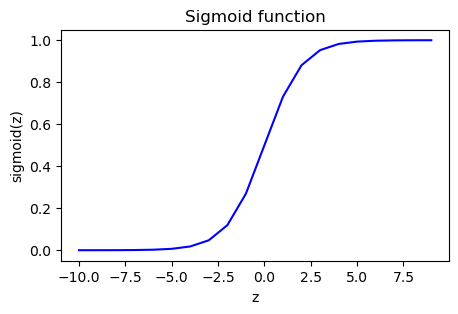

In [68]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Generate an array of evenly spaced values between -10 and 10
z_tmp = np.arange(-10, 10)

# Use the function implemented above to get the sigmoid values
y = sigmoid(z_tmp)

fig, ax = plt.subplots(1, 1, figsize = (5, 3))
ax.plot(z_tmp, y, c="b")

ax.set_title("Sigmoid function")
ax.set_ylabel('sigmoid(z)')
ax.set_xlabel('z')

### Q2

In [57]:
def softmax(z):
    max_z = np.max(z)
    exp_z = np.exp(z - max_z)
    sum_exp_z = np.sum(exp_z)
    return exp_z / sum_exp_z

z = np.array([[4, 1, 8, 7], [2, 3, 1, 9]])
probs = softmax(z)

print(probs)

[[4.450e-03 2.216e-04 2.430e-01 8.939e-02]
 [6.023e-04 1.637e-03 2.216e-04 6.605e-01]]


### Q3

In [67]:
# Relu function
def relu(x):
    return max(0, x)

# leaky-Relu function
def leaky_relu(x, alpha = 0.01):
    return x if x >= 0 else alpha * x

# Tanh function
def tanh(x):
    return (np.exp(x) - np.exp(-x)) / (np.exp(x) + np.exp(-x))

y = tanh(np.array([-3.0, -1.0, 0.0, 1.0, 5.0]))
print(y)

[-0.995 -0.762  0.     0.762  1.   ]


### Q4

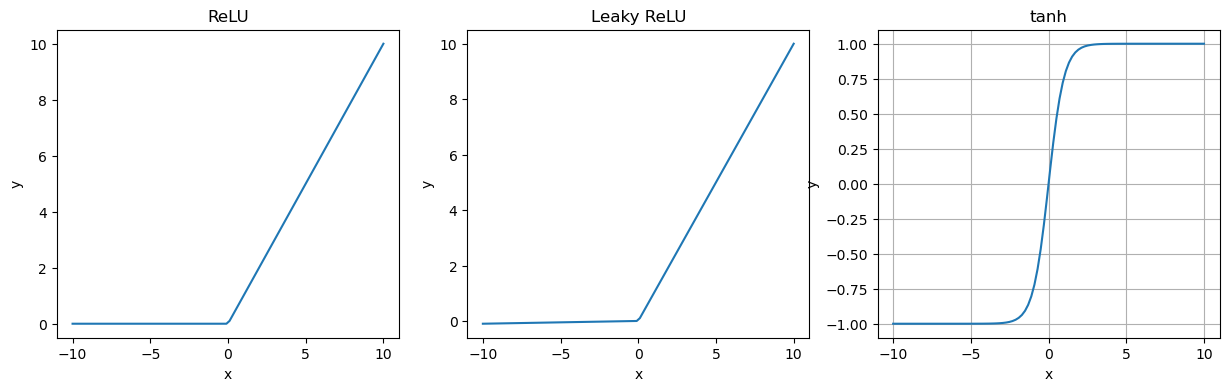

In [80]:
x = np.linspace(-10, 10, 100)

y1 = np.maximum(0, x)
y2 = np.where(x > 0, x, 0.01 * x)
y3 = np.tanh(x)

plt.figure(figsize = (15, 4))

# Plot ReLU in the first subplot
plt.subplot(131)
plt.plot(x, y1, label = 'ReLU')
plt.xlabel('x')
plt.ylabel('y')
plt.title('ReLU')

# Plot Leaky ReLU in the second subplot
plt.subplot(132)
plt.plot(x, y2, label = 'Leaky ReLU')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Leaky ReLU')

# Plot tanh in the third subplot
plt.subplot(133)
plt.plot(x, y3, label = 'tanh')
plt.xlabel('x')
plt.ylabel('y')
plt.title('tanh')

# fig, ax = plt.subplots(1, 1, figsize = (5, 3))
# ax.plot(x, y1, c = "r")

# fig, ax = plt.subplots(1, 1, figsize = (5, 3))
# ax.plot(x, y2, c = "g")

# fig, ax = plt.subplots(1, 1, figsize = (5, 3))
# ax.plot(x, y3, c = "b")

plt.grid(True)